# Lasso Regression
This notebook runs lasso regression to generate a feature importance matrix for 100 tfs for 100 genes

#### Imports

In [10]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import pandas as pd
import os
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf, linewidth=np.inf)


In [6]:
fiveFiftyPath = r"..\..\5_mr_50_cond\simulated_noNoise.txt"
fourtyFiftyPath = r"..\..\40_mr_50_cond\simulated_noNoise.txt"
hundidHundidPath = r"..\..\100_mr_100_cond\simulated_noNoise.txt"


data_5_mr_50_cond = np.loadtxt(fiveFiftyPath)
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseAll", data_5_mr_50_cond)
data_5_mr_50_cond_tfs = data_5_mr_50_cond[1:,:100]
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseTFs", data_5_mr_50_cond_tfs)
data_5_mr_50_cond_tgs = data_5_mr_50_cond[1:,100:200]
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseTGs", data_5_mr_50_cond_tgs)

data_40_mr_50_cond = np.loadtxt(fourtyFiftyPath)
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseAll", data_40_mr_50_cond)
data_40_mr_50_cond_tfs = data_40_mr_50_cond[1:,:100]
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseTFs", data_40_mr_50_cond_tfs)
data_40_mr_50_cond_tgs = data_40_mr_50_cond[1:,100:200]
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseTGs", data_40_mr_50_cond_tgs)

data_100_mr_100_cond = np.loadtxt(hundidHundidPath)
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseAll", data_100_mr_100_cond)
data_100_mr_100_cond_tfs = data_100_mr_100_cond[1:,:100]
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseTFs", data_100_mr_100_cond_tfs)
data_100_mr_100_cond_tgs = data_100_mr_100_cond[1:,100:200]
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseTGs", data_100_mr_100_cond_tgs)

#### Data preprocessing

Normalized Target Genes and TFs for 100 MR, 40 MR, and 5 MR


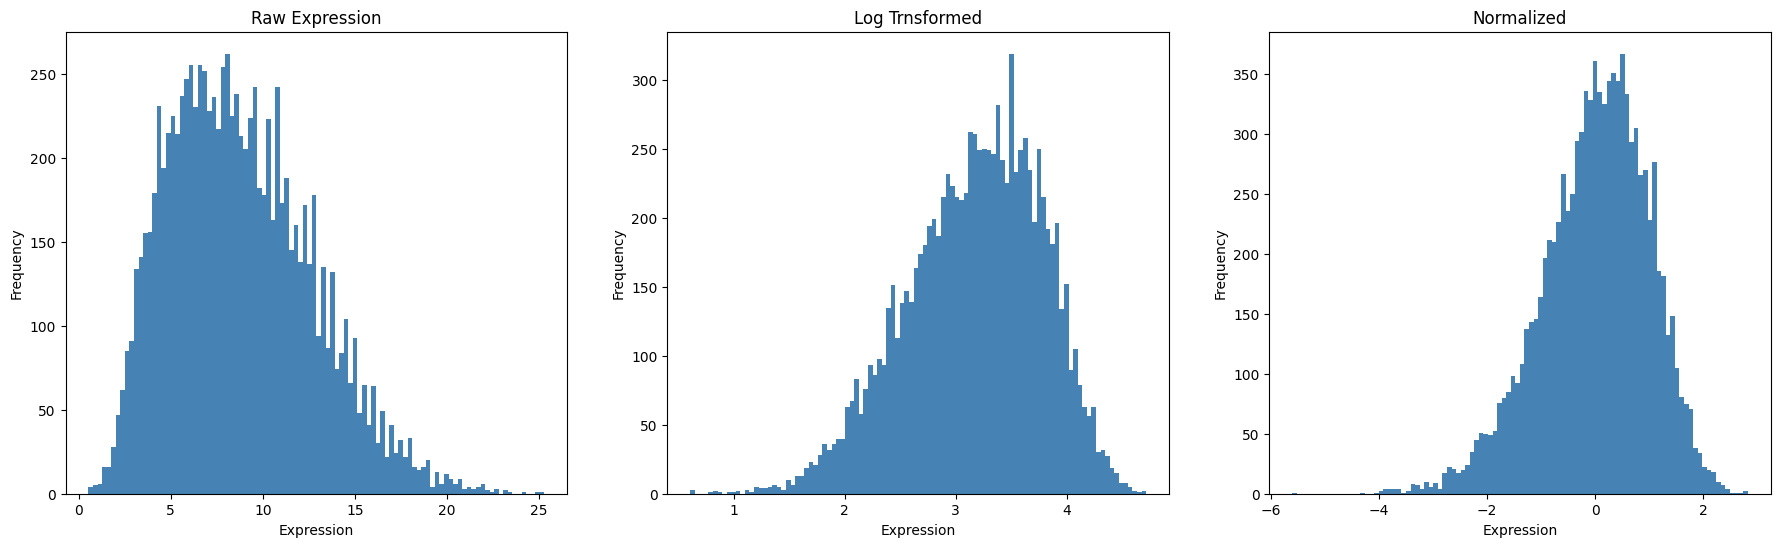

In [7]:

# Load ground truth
ground_truth_path_100mr_100cond = "../../100_mr_100_cond/bipartite_GRN.csv"
ground_truth = pd.read_csv(ground_truth_path_100mr_100cond, header=None).values

ground_truth_path_40mr = "../../40_mr_50_cond/bipartite_GRN.csv"
ground_truth40 = pd.read_csv(ground_truth_path_40mr, header=None).values

ground_truth_path_5mr = "../../5_mr_50_cond/bipartite_GRN.csv"
ground_truth5 = pd.read_csv(ground_truth_path_5mr, header=None).values

## Log Normalization
data_100_mr_100_cond_tfs_LOG = np.log2(data_100_mr_100_cond_tfs + 1)
data_100_mr_100_cond_tgs_LOG = np.log2(data_100_mr_100_cond_tgs + 1)

data_5_mr_50_cond_tfs_LOG = np.log2( data_5_mr_50_cond_tfs+ 1)
data_5_mr_50_cond_tgs_LOG = np.log2(data_5_mr_50_cond_tgs+1)

data_40_mr_50_cond_tfs_LOG = np.log2(data_40_mr_50_cond_tfs+1)
data_40_mr_50_cond_tgs_LOG = np.log2(data_40_mr_50_cond_tgs+1)


## Transform features to zero mean, 1 stdev
scaler = StandardScaler()

tf_100mr_normalized = scaler.fit_transform(data_100_mr_100_cond_tfs_LOG)
tg_100mr_nomralized = scaler.fit_transform(data_100_mr_100_cond_tgs_LOG)

tf_40mr_normalized = scaler.fit_transform(data_40_mr_50_cond_tfs_LOG)
tg_40mr_normalized = scaler.fit_transform(data_40_mr_50_cond_tgs_LOG)

tf_5mr_normalized = scaler.fit_transform(data_5_mr_50_cond_tfs_LOG)
tg_5mr_normalized = scaler.fit_transform(data_5_mr_50_cond_tgs_LOG)

print("Normalized Target Genes and TFs for 100 MR, 40 MR, and 5 MR")

fig, axs = plt.subplots(1, 3, figsize=(22, 6))

axs[0].hist(data_100_mr_100_cond_tgs.flatten(), bins=100, color='steelblue')
axs[0].set_title('Raw Expression')
axs[0].set_xlabel('Expression')
axs[0].set_ylabel('Frequency')

axs[1].hist(data_100_mr_100_cond_tgs_LOG.flatten(), bins=100, color='steelblue')
axs[1].set_title('Log Trnsformed')
axs[1].set_xlabel('Expression')
axs[1].set_ylabel('Frequency')

axs[2].hist(tg_100mr_nomralized.flatten(), bins=100, color='steelblue')
axs[2].set_title('Normalized')
axs[2].set_xlabel('Expression')
axs[2].set_ylabel('Frequency')
plt.show()

#### Lasso Regression Models

In [95]:
importance_matrix_100mr = np.zeros((100, 100))
importance_matrix_40mr = np.zeros((100, 100))
importance_matrix_5mr = np.zeros((100, 100))



for i in range(0, 100):
    X = tf_100mr_normalized
    y = tg_100mr_nomralized[:, i]
    regressor = Lasso(alpha=0.04, max_iter=10000)
    regressor.fit(X, y)
    importance_matrix_100mr[:, i] = regressor.coef_

    X1 = tf_40mr_normalized
    y1 = tg_40mr_normalized[:, i]
    regressor1 = Lasso(alpha=0.02, max_iter=10000)
    regressor1.fit(X1, y1)
    importance_matrix_40mr[:, i] = regressor1.coef_

    X2 = tf_5mr_normalized
    y2 = tg_5mr_normalized[:, i]
    regressor2 = Lasso(alpha=0.02, max_iter=10000)
    regressor2.fit(X2, y2)
    importance_matrix_5mr[:, i] = regressor2.coef_

print(np.sum(importance_matrix_100mr!=0)/100)
print(np.sum(importance_matrix_40mr!=0)/100)
print(np.sum(importance_matrix_5mr!=0)/100)
print("Lasso Regression Coefficients for 100 MR, 40 MR, and 5 MR")

35.79
34.57
18.49
Lasso Regression Coefficients for 100 MR, 40 MR, and 5 MR


#### Calculate AUROC & Recall

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

def create_adjacency_matrix(edge_list, n_tfs, n_targets):
    adj_matrix = np.zeros((n_tfs, n_targets))
    for tf, target in edge_list:
        adj_matrix[int(tf), int(target-100)] = 1
    return adj_matrix

def get_auc_scores(importance, gt):
    aucs = np.zeros((100,1))
    for i in range(100):
        gt_i = gt[:,i]
        importance_i = importance[:,i]
        aucs[i] = roc_auc_score(gt_i, importance_i)

    return(aucs)

def get_recall(importance, gt):
    recalls = np.zeros((100,1))
    importance = importance !=0
    gt = gt !=0
    for i in range(100):
        gt_i = gt[:,i]
        importance_i = importance[:,i]
        recalls[i] = recall_score(gt_i, importance_i)

    return(recalls)



ground_truth_matrix = create_adjacency_matrix(ground_truth, 100, 100)
ground_truth_matrix40mr = create_adjacency_matrix(ground_truth40, 100,100)
ground_truth_matrix5mr = create_adjacency_matrix(ground_truth5, 100, 100)

auc_lasso_100 = get_auc_scores(importance_matrix_100mr, ground_truth_matrix)
auc_lasso_40 = get_auc_scores(importance_matrix_40mr, ground_truth_matrix40mr)
auc_lasso_5 = get_auc_scores(importance_matrix_5mr, ground_truth_matrix5mr)
recall_lasso_100 = get_recall(importance_matrix_100mr, ground_truth_matrix)

np.savetxt("Resulting_auc/auc_scores_lasso_100.csv", auc_lasso_100, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_lasso_40.csv", auc_lasso_40, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_lasso_5.csv", auc_lasso_5, delimiter=",", fmt="%.5f", comments="")

print(np.mean(auc_lasso_100))
print(np.mean(auc_lasso_40))
print(np.mean(auc_lasso_5))


0.7856877192590933
0.7205467937769909
0.7095347733505747
